# Distributions Recap
    
In general we can think of distributions as a way of counting occurances of unique values generated by a random generator.

More technically the distribution of a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur.

The frequency of occurrence or the natural geographic range or place where any item or category of items occurs. 


<hr>

## Bernoulli Distribution Recap

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial.

So the random variable X which has a Bernoulli distribution can take value 1 with the probability of success, say p, and the value 0 with the probability of failure, say q or 1-p.



##### Bernouli Distribution Exercise

Generate 1000 samples of coin flips using the bernoulli distribution. Where flipping heads has a 50% chance.

##### Bernoulli Distribution Example

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli')]

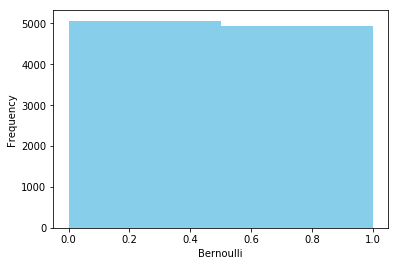

In [20]:
# Import Libraries
from scipy.stats import bernoulli
import seaborn as sns


# Generate random numbers from N(0,1)
data_bern = bernoulli.rvs(size=10000,p=0.5)

# Plot distribution
# ax = sns.distplot(data_bern)

# Uncomment and comment the line above to see the difference in graphs
ax = sns.distplot(data_bern,
                 bins=2,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli', ylabel='Frequency')

## Normal Distributions (Bell Curve)

A normal distribution is a distribution that resembles a bell (hence the nickname). The bell curve is symmetrical. Half of the data will fall to the left of the mean, half will fall to the right.

<br>

![Normal Distribution](assets/normal_distributions.gif)

<br>

Properties of a normal distribution:
- The mean, mode and median are all equal.
- The curve is symmetric at the center (i.e. around the mean, μ).
- Exactly half of the values are to the left of center and exactly half the values are to the right.
- The total area under the curve is 1

Resources:
- [DataCamp Video - Normal Distributions](https://campus.datacamp.com/courses/foundations-of-probability-in-python/important-probability-distributions?ex=1)

##### Normal Distribution Example

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

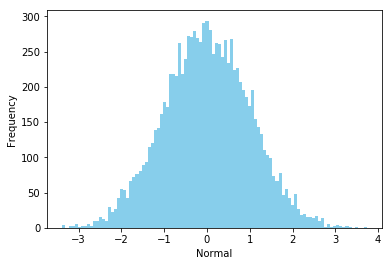

In [21]:
# Import Libraries
from scipy.stats import norm
import seaborn as sns


# Generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

# Plot distribution
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal', ylabel='Frequency')

### Negative Binomial

A negative binomial distribution (also called the Pascal Distribution) is a discrete probability distribution for random variables in a negative binomial experiment.

More technically this is a discrete probability distribution of the number of successes in a sequence of independent and identically distributed Bernoulli trials before a specified (non-random) number of failures (denoted r) occurs. 

For example, if we define a 1 as failure, all non-1s as successes, and we throw a dice repeatedly until 1 appears the third time (r = three failures), then the probability distribution of the number of non-1s that appeared will be a negative binomial distribution.

##### Negative Binomial Example

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Negative Binomial')]

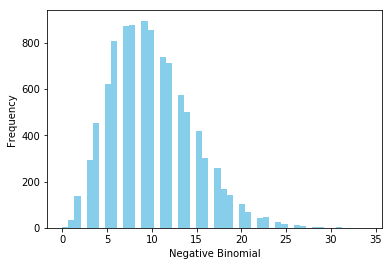

In [22]:
# Import Libraries
from scipy.stats import nbinom


data_nbinom = nbinom.rvs(10, 0.5, size=10000)

ax = sns.distplot(data_nbinom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Negative Binomial', ylabel='Frequency')

## Continuous Distributions

**Note:** that for continuous distributions the probability at a single point is essentially 0 because there are an infinite amount of values a point could be.


### Probability Density Function 

Probability density function (PDF) is a statistical expression that defines a probability distribution for a continuous random variable as opposed to a discrete random variable.

For a continuous function, the probability density function (pdf) is the probability that the variate has the value x. 


##### Probability Density Function Example

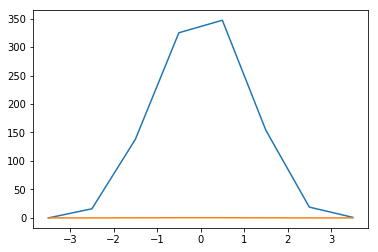

In [23]:
# Import Libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)

histogram = np.histogram(samples, bins=bins)[0]
bins = 0.5*(bins[1:] + bins[:-1])

pdf = stats.norm.pdf(bins)  # norm is a distribution object

plt.plot(bins, histogram) 
plt.plot(bins, pdf) 

### Cumalitive Density Function 
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x. 

##### Cumulative Distribution Function Example

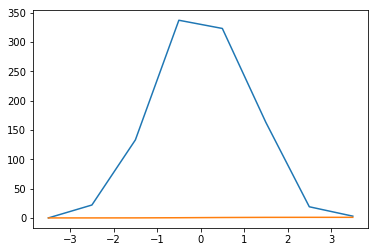

In [24]:
# Import Libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)

histogram = np.histogram(samples, bins=bins)[0]
bins = 0.5*(bins[1:] + bins[:-1])

cdf = stats.norm.cdf(bins)  # norm is a distribution object

plt.plot(bins, histogram) 
plt.plot(bins, cdf) 

### Empirical Cumulative Distribution Function (ECDF)

An empirical cumulative distribution function (also called the empirical distribution function, ECDF, or just EDF) and a cumulative distribution function are basically the same thing: 
- they are both probability models for data
- While a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data

##### Covering:
- Import data using Pandas
- Create a ECDF function using Numpy
- Prepare the data for plotting
- Plot the ECDF

In [25]:
# Import Pandas
import pandas as pd 

# Import CSV using Pandas
iris_df = pd.read_csv('../data/Iris.csv')

print(iris_df['Species'].unique())
iris_df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Create ECDF Function using Numpy

In [26]:
# Import numpy
import numpy as np

def prep_ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

##### Prepare and Plot

In [27]:
# Prepare Species Data
is_versicolor = iris_df["Species"] == "Iris-versicolor"

# Create dataframe with records only consisting of Species = Iris-versicolor
versicolor_df = iris_df[is_versicolor]

# Create List of Iris-versicolor SepalLengthCm values
versicolor_sepal_length = versicolor_df["SepalLengthCm"]

# Prep ECDF
x,y = prep_ecdf(versicolor_sepal_length)

##### Plot the ECDF

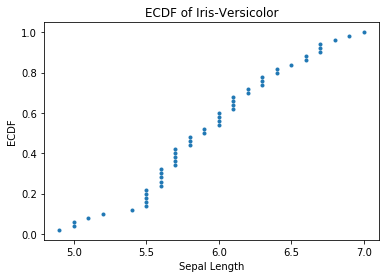

In [28]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Set up Figure
plt.figure()

# Grab the `axis` and save to `ax`
ax = plt.gca()

# ax.plot() is a simple `line plot`
ax.plot(x, y, marker = ".", linestyle = "none")

# Make it Pretty
ax.set_title("ECDF of Iris-Versicolor")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("ECDF")

# Plot ECDF
plt.show()